# **KAIST EE**
#  **[EE488] note 02B. CartPole (using a reinforcement learning library)**
## **Instructor**: Prof. Yoon, Young-Gyu (ygyoon@kaist.ac.kr)
### This example code was prepared by EE488 teaching assistants Han, Seungjae (jay0118@kaist.ac.kr) & Shin, Changyeop (scey26@kaist.ac.kr).

- Class Date : 22.03.xx.
- Office Hour : -----------
- If you have any questions, ask via KLMS Q&A board or come to TA office hour to get our help.

---

### 0. In this example, we will for solve CartPole (an inverted pendulum problem) again using a library called **Stable Baselines3** which provides multiple state-of-the-art reinforcement learning algorithms. This way, we can try multiple algorithms without having to to worry about any low level implementation of the algorithms


**Stable Baselines3**

Stable Baselines3 (SB3) is a set of reliable implementations of reinforcement learning algorithms in PyTorch. It is the next major version of Stable Baselines.

Github repository: https://github.com/DLR-RM/stable-baselines3

Paper: https://jmlr.org/papers/volume22/20-1364/20-1364.pdf
https://stable-baselines3.readthedocs.io/en/master/

Manual: https://stable-baselines3.readthedocs.io/_/downloads/en/master/pdf/



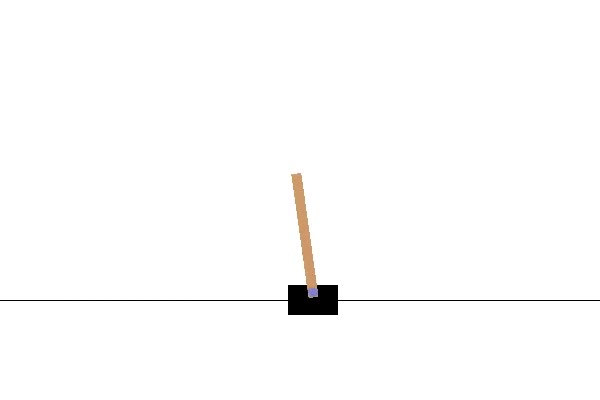


**CartPole-v1**
A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

https://gym.openai.com/envs/CartPole-v1/





### 1. Let's Install **stable-baselines3**.

In [1]:
! pip install stable-baselines3[extra]

     |████████████████████████████████| 177 kB 5.4 MB/s 
     |████████████████████████████████| 1.5 MB 34.1 MB/s 
     |████████████████████████████████| 1.6 MB 30.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616827 sha256=3f68b1c909e4153e799c50f35bf0a66d435c7288d0840b61391586a94f082b19
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.4.2-py3-none-any.whl size=441027 sha256=c6329e919b1ba3c76cc4e38331f7ea0798b8b7eecbf0789575eb64fc7b9ff28a
  Stored in directory: /root/.cache/pip/wheels/87/67/2e/6147e7912fe37f5408b80d07527dab807c1d25f5c403a9538a
Successfully built gym AutoROM.accept-rom-license
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3

### 2. Let's **mount Google drive** so that we can save files as we need.

In [2]:
from google.colab import drive
drive.mount("/content/drive")
import sys
import os

filepath = "/content/drive/My Drive/AIcapstone/RL_exercise3/Colab/"  # Change this path for your Google drive setting.
sys.path.append(filepath)
experiment = "CartPole_02B"

if not os.path.exists(f"{filepath}"):
    os.makedirs(f"{filepath}")
if not os.path.exists(f"{filepath}/{experiment}"):
    os.makedirs(f"{filepath}/{experiment}")

Mounted at /content/drive




### 3. Let's install a few more things to setup RL enviroment. 

In [3]:
# install required system dependencies
! apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
! pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

# Followings are for visualization (as we are running on server without a physical display!)
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libxxf86dga1 x11-utils xvfb
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 993 kB of archives.
After this operation, 2,982 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libxxf86dga1 amd64 2:1.1.4-1 [13.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 x11-utils amd64 7.7+3build1 [196 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.10 [784 kB]
Fetched 993 kB in 1s (1,179 kB/s)
Selecting previously unselected package libxxf86dga1:amd64.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2

### 4.  And then, let's **import the libraries** (including stable-baselines3) we need to use.

In [4]:
import gym
import torch

from stable_baselines3 import A2C, DQN, PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecExtractDictObs, VecMonitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import VecVideoRecorder
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.callbacks import BaseCallback

### 5. We need a bunch of stuff for **visualization** (as we are running on server without a physical display!). Let's not worry about the details here.

In [5]:
from stable_baselines3.common.monitor import Monitor as TrainMonitor
from gym.wrappers import Monitor as EvalMonitor
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import io
import base64
from IPython.display import HTML, clear_output
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display

display = Display(visible=0, size=(400, 300))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '400x300x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

### 6. Here's our function for visualization of the result as a **video**.

In [6]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = EvalMonitor(env, './video', force=True)
  return env

### 7. Here's a function to **check the training process**. 

In [7]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq:
    :param log_dir: Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: Verbosity level.
    """
    def __init__(self, check_freq: int, log_dir: str, verbose: int = 1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print(f"Num timesteps: {self.num_timesteps}")
                print(f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}")

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print(f"Saving new best model to {self.save_path}")
                  self.model.save(self.save_path)

        return True

### 8. Let's start **training DQN**. This is pretty much all we need (everything is encapsulated in stable-baselines3). Of course, you can easily change the hyperparameters if you want. See the manual below. 

https://stable-baselines3.readthedocs.io/_/downloads/en/master/pdf/

Below shows the list of hyperparameters we can change.

**DQN**(policy, env, learning_rate=0.0001, buffer_size=1000000,
learning_starts=50000, batch_size=32, tau=1.0, gamma=0.99,
train_freq=4, gradient_steps=1, replay_buffer_class=None,
replay_buffer_kwargs=None, optimize_memory_usage=False,
target_update_interval=10000, exploration_fraction=0.1,
exploration_initial_eps=1.0, exploration_final_eps=0.05,
max_grad_norm=10, tensorboard_log=None, create_eval_env=False,
policy_kwargs=None, verbose=0, seed=None, device='auto',
_init_setup_model=True)


Using cuda device
Wrapping the env in a DummyVecEnv.
Num timesteps: 10000
Best mean reward: -inf - Last mean reward per episode: 21.94
Saving new best model to /tmp/gym/best_model
Num timesteps: 20000
Best mean reward: 21.94 - Last mean reward per episode: 22.04
Saving new best model to /tmp/gym/best_model
Num timesteps: 30000
Best mean reward: 22.04 - Last mean reward per episode: 22.78
Saving new best model to /tmp/gym/best_model
Num timesteps: 40000
Best mean reward: 22.78 - Last mean reward per episode: 21.71
Num timesteps: 50000
Best mean reward: 22.78 - Last mean reward per episode: 23.37
Saving new best model to /tmp/gym/best_model
Num timesteps: 60000
Best mean reward: 23.37 - Last mean reward per episode: 14.43
Num timesteps: 70000
Best mean reward: 23.37 - Last mean reward per episode: 10.09
Num timesteps: 80000
Best mean reward: 23.37 - Last mean reward per episode: 11.26
Num timesteps: 90000
Best mean reward: 23.37 - Last mean reward per episode: 49.68
Saving new best model

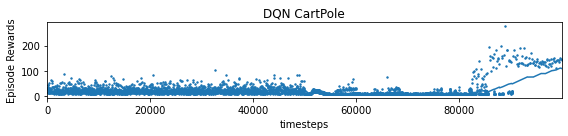

In [8]:
# env = make_atari_env('CartPole-v1', n_envs=1, seed=0)
env = gym.make('CartPole-v1')

# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = TrainMonitor(gym.make('CartPole-v1'), log_dir)
model = DQN('MlpPolicy', env, buffer_size=int(1e4), verbose=1)

# See below to check the list of hyperparameters we can control
# DQN(policy, env, learning_rate=0.0001, buffer_size=1000000, 
# learning_starts=50000, batch_size=32, tau=1.0, gamma=0.99,
# train_freq=4, gradient_steps=1, replay_buffer_class=None,
# replay_buffer_kwargs=None, optimize_memory_usage=False,
# target_update_interval=10000, exploration_fraction=0.1,
# exploration_initial_eps=1.0, exploration_final_eps=0.05,
# max_grad_norm=10, tensorboard_log=None, create_eval_env=False,
# policy_kwargs=None, verbose=0, seed=None, device='auto',
# _init_setup_model=True)


# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=10000, log_dir=log_dir)

timesteps = int(1e5)
model.learn(total_timesteps=timesteps, callback = callback, eval_freq=10000, log_interval=10000)

plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN CartPole")
plt.show()

### 9. Now, let's **evaluate** the performance of the trained network (DQN)!

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import A2C, DQN, PPO

env_id = 'CartPole-v1'

# Evaluate the agent
env = wrap_env(gym.make(env_id))

# model = PPO.load('SAVED_PATH', env)

# mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
# print(mean_reward, std_reward)

# Enjoy trained agent
obs = env.reset()

while True:
    action, _states = model.predict(obs, deterministic=False)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones == True:
        break
env.close()
show_video()

### **Congratulations**! You sucessfully trained a DQN using stable-baselines3.

---

### 10. Let's just try one more thing. The point of using library is to make our lives easier...so let's see how easy it is. Below is all we need to train the agent using PPO algorithm.

**PPO**(policy, env, learning_rate=0.0003, n_steps=2048, batch_size=64,
n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2,
clip_range_vf=None, normalize_advantage=True, ent_coef=0.0,
vf_coef=0.5, max_grad_norm=0.5, use_sde=False, sde_sample_freq=- 1,
target_kl=None, tensorboard_log=None, create_eval_env=False,
policy_kwargs=None, verbose=0, seed=None, device='auto',
_init_setup_model=True)

Using cpu device
Wrapping the env in a DummyVecEnv.
Num timesteps: 10000
Best mean reward: -inf - Last mean reward per episode: 55.92
Saving new best model to /tmp/gym/best_model
Num timesteps: 20000
Best mean reward: 55.92 - Last mean reward per episode: 141.81
Saving new best model to /tmp/gym/best_model
Num timesteps: 30000
Best mean reward: 141.81 - Last mean reward per episode: 227.62
Saving new best model to /tmp/gym/best_model
Num timesteps: 40000
Best mean reward: 227.62 - Last mean reward per episode: 316.83
Saving new best model to /tmp/gym/best_model
Num timesteps: 50000
Best mean reward: 316.83 - Last mean reward per episode: 393.41
Saving new best model to /tmp/gym/best_model
Num timesteps: 60000
Best mean reward: 393.41 - Last mean reward per episode: 460.22
Saving new best model to /tmp/gym/best_model
Num timesteps: 70000
Best mean reward: 460.22 - Last mean reward per episode: 487.72
Saving new best model to /tmp/gym/best_model
Num timesteps: 80000
Best mean reward: 487

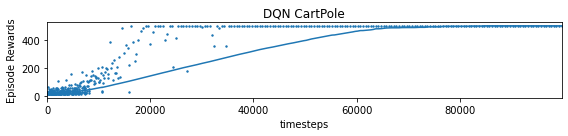

In [ ]:
env = gym.make('CartPole-v1')

# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
env = TrainMonitor(gym.make('CartPole-v1'), log_dir)
model2 = PPO('MlpPolicy', env, verbose=1)

# See below to check the list of hyperparameters we can control
# PPO(policy, env, learning_rate=0.0003, n_steps=2048, batch_size=64,
# n_epochs=10, gamma=0.99, gae_lambda=0.95, clip_range=0.2,
# clip_range_vf=None, normalize_advantage=True, ent_coef=0.0,
# vf_coef=0.5, max_grad_norm=0.5, use_sde=False, sde_sample_freq=- 1,
# target_kl=None, tensorboard_log=None, create_eval_env=False,
# policy_kwargs=None, verbose=0, seed=None, device='auto',
# _init_setup_model=True)


# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=10000, log_dir=log_dir)

timesteps = int(1e5)
model2.learn(total_timesteps=timesteps, callback = callback, eval_freq=10000, log_interval=10000)

plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "DQN CartPole")
plt.show()

### 11. Again, let's **evaluate** the performance of the trained network (PPO)!

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import A2C, DQN, PPO

env_id = 'CartPole-v1'

# Evaluate the agent
env = wrap_env(gym.make(env_id))

# model = PPO.load('SAVED_PATH', env)

# mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
# print(mean_reward, std_reward)

# Enjoy trained agent
obs = env.reset()

while True:
    action, _states = model2.predict(obs, deterministic=False)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones == True:
        break
env.close()
show_video()